In [2]:
# Load required packages
library(alakazam)
library(dowser)
library(airr)
library(dplyr)

# read the database
db <- read_airr("/home/phil/processed_docker/wt_docker/changeo_10x/wt_filtered_contig_heavy_germ-pass.tsv")
glimpse(db)

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 


Attaching package: ‘dowser’


The following objects are masked from ‘package:alakazam’:

    ExampleDb, ExampleTrees



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 4,457
Columns: 62
$ sequence_id               <chr> "AGTCTTTGTAGGGACT-1_contig_2", "ACTATCTTCTG…
$ sequence                  <chr> "GGAAACATATGTCCAATGTCCTCTCCACAATCCCTGAAGACA…
$ rev_comp                  <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ productive                <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, T…
$ v_call                    <chr> "IGHV1-42*01", "IGHV1-42*01", "IGHV1-62-2*0…
$ d_call                    <chr> "IGHD2-3*01", "IGHD4-1*01,IGHD4-1*02", "IGH…
$ j_call                    <chr> "IGHJ3*01", "IGHJ3*01", "IGHJ3*01", "IGHJ3*…
$ sequence_alignment        <chr> "GAGGTCCAGCTGCAGCAGTCTGGACCT...GAGCTGGTGAAG…
$ germline_alignment        <chr> "GAGGTCCAGCTGCAGCAGTCTGGACCT...GAGCTGGTGAAG…
$ junction                  <chr> "TGTGCAGGCTTCTATGATGAGGCCTGGTTTGCTTACTGG", …
$ junction_aa               <chr> "CAGFYDEAWFAYW", "CARLRGWDPFAYW", "CARHEELG…
$ v_cigar                   <chr> "111S291=", "109S294=", "114S302=", "88S293…
$ d_cigar                   

In [3]:
clones <- formatClones(
db,
seq = "sequence_alignment",
clone = "clone_id",
subclone = "subclone_id",
nproc = 16,
chain = "H",
heavy = "IGH",
trait = "c_call",
cell = "cell_id",
locus = "locus",
minseq = 2,
split_light = FALSE,
majoronly = FALSE,
columns = NULL,
)

print(clones)

# A tibble: 6 x 4
  clone_id  data       locus  seqs
  <chr>     <list>     <chr> <int>
1 1413_717  <airrClon> IGH       2
2 186_2892  <airrClon> IGH       2
3 2931_1238 <airrClon> IGH       2
4 3479_2481 <airrClon> IGH       2
5 4521_2349 <airrClon> IGH       2
6 951_448   <airrClon> IGH       2


In [4]:
# Build maxmimum parsimony trees for first four clones using 
# phangorn package in R
trees <- getTrees(clones)

# simple tree plotting with ggtree R package with isotypes at tips
wt_plot <- plotTrees(trees, nodes = FALSE, tips="c_call", tipsize = 4, node_palette = "Dark2", title = TRUE)

In [5]:
treesToPDF(wt_plot, "wt_plots.pdf", width = 5, height = 6)

png 
  2

In [6]:
# simple tree plotting with ggtree R package with isotypes at tips
scaleBranches(trees, edge_type = "mutations")

clone_id  data                                                    locus seqs
1 1413_717  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
2 186_2892  <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
3 2931_1238 <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
4 3479_2481 <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
5 4521_2349 <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
6 951_448   <S4 class ‘airrClone’ [package “dowser”] with 12 slots> IGH   2   
  trees                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

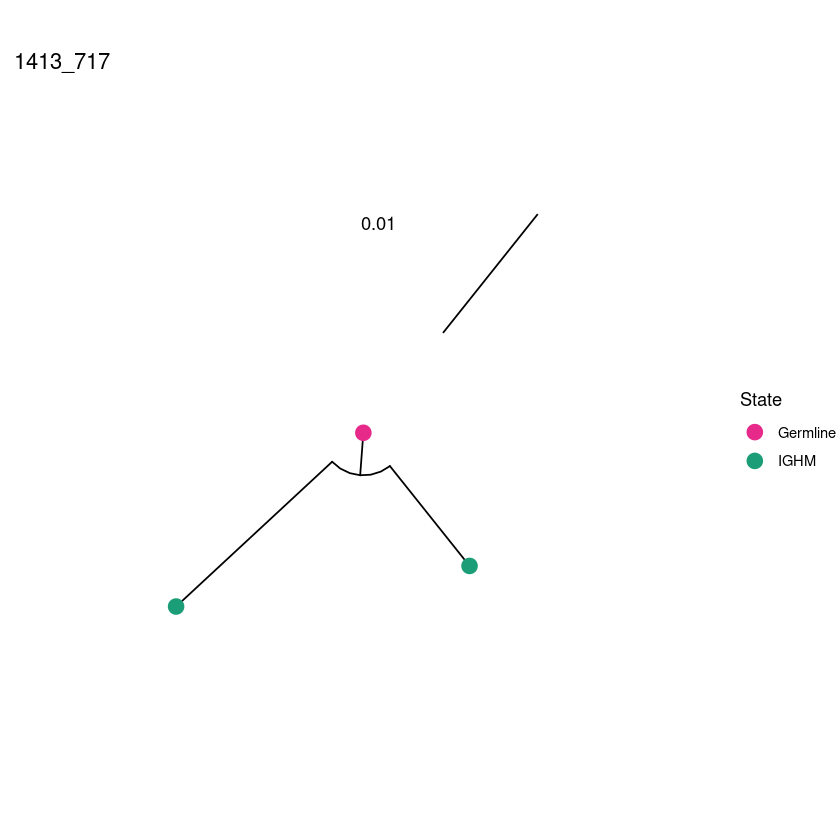

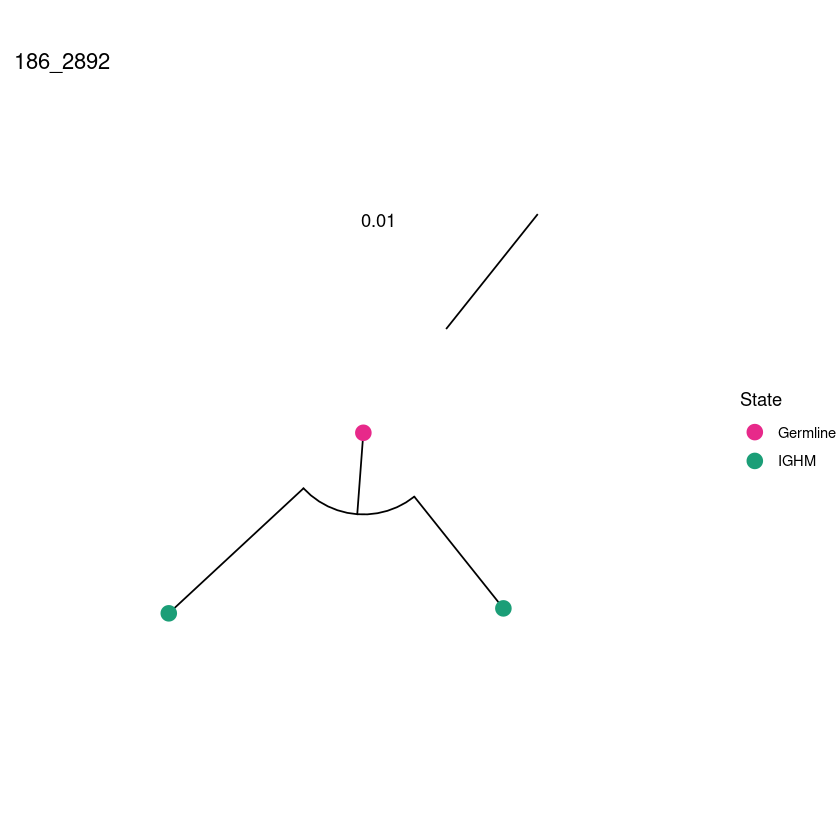

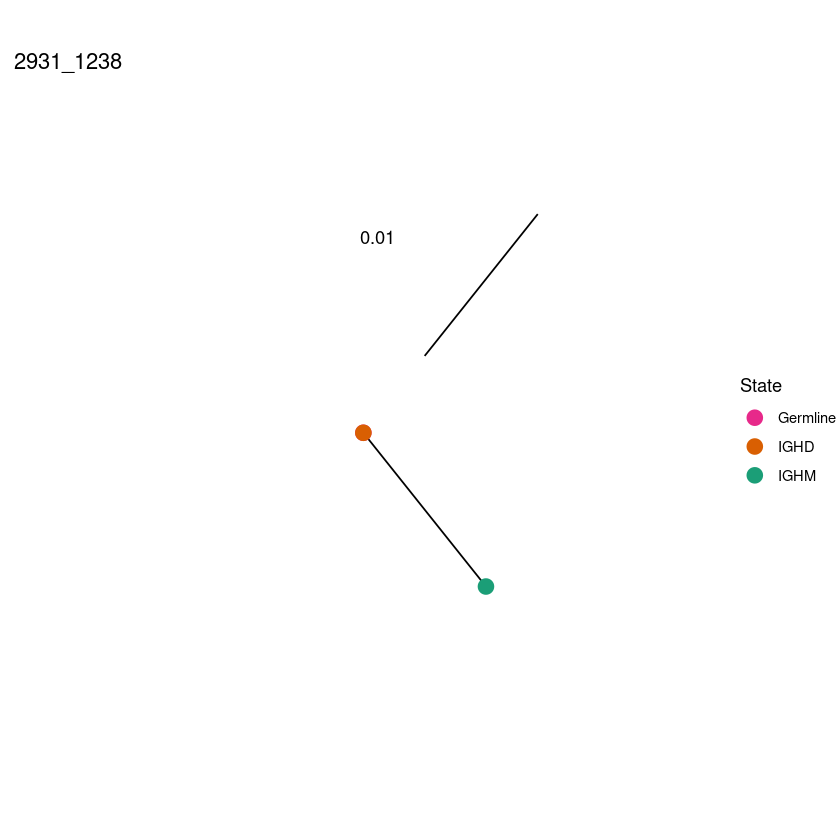

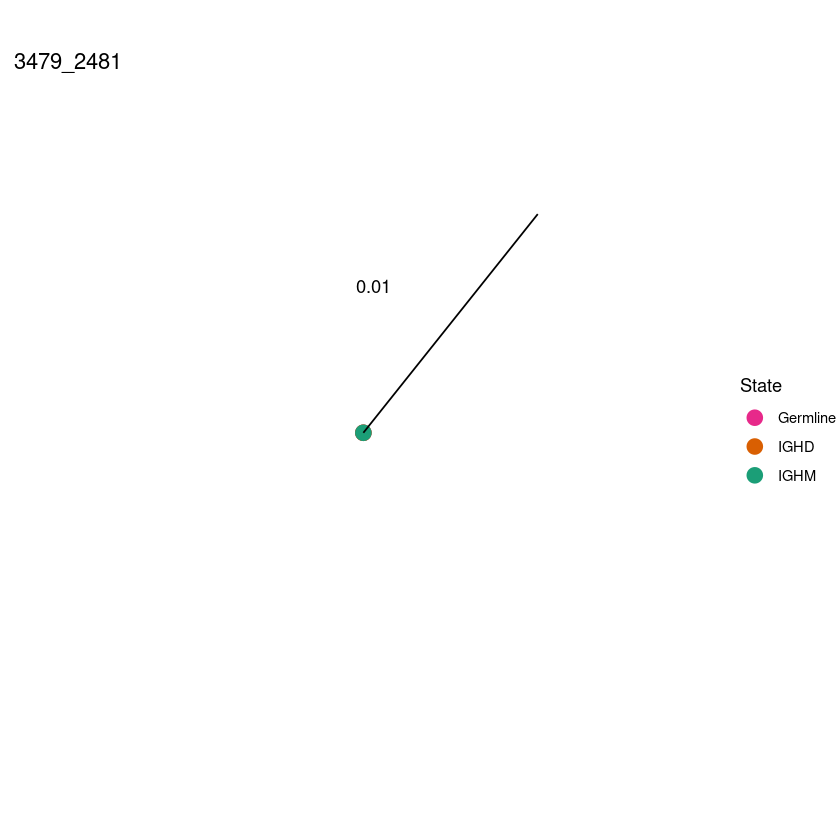

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


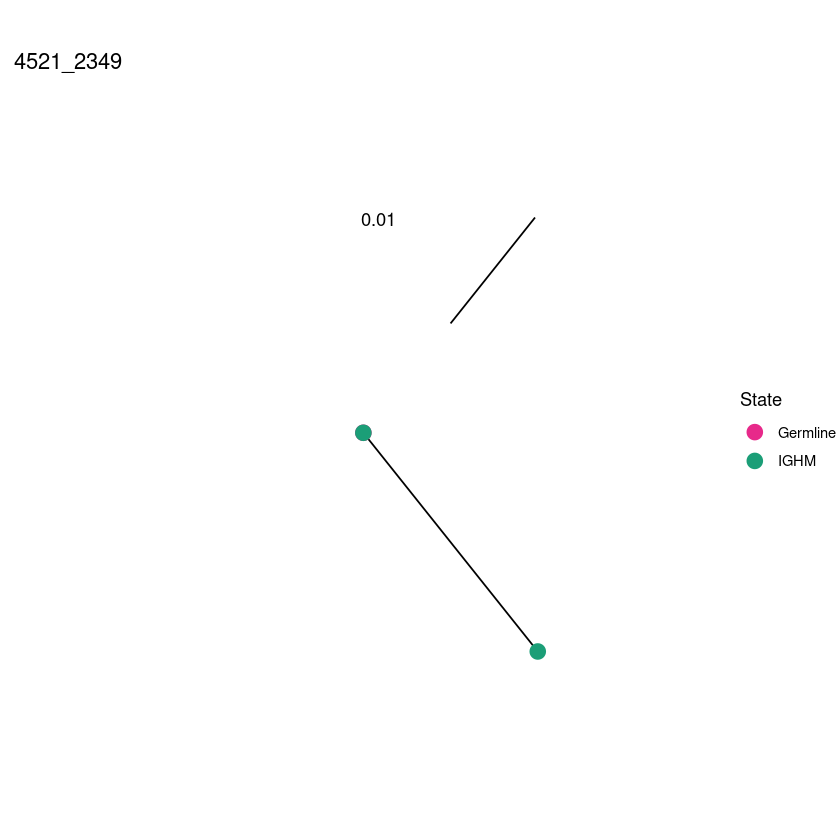

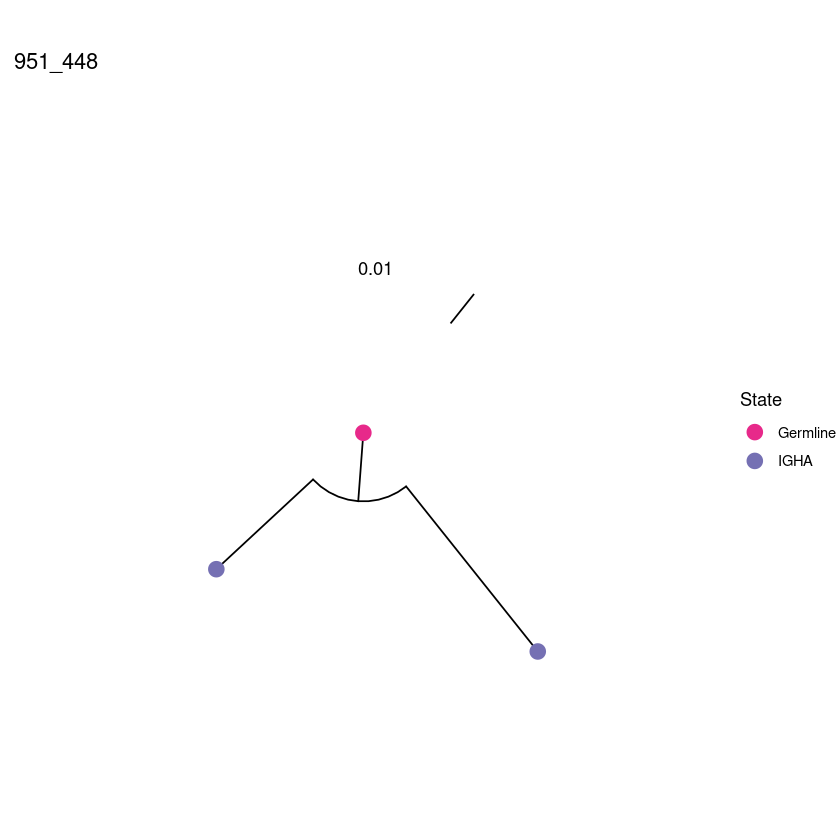

In [7]:
# plot lineage trees in circular
plotTrees(trees, tips="c_call", tipsize = 4, node_palette = "Dark2", title = TRUE, layout = "circular")

$title
[1] "B cell tree"

attr(,"class")
[1] "labels"

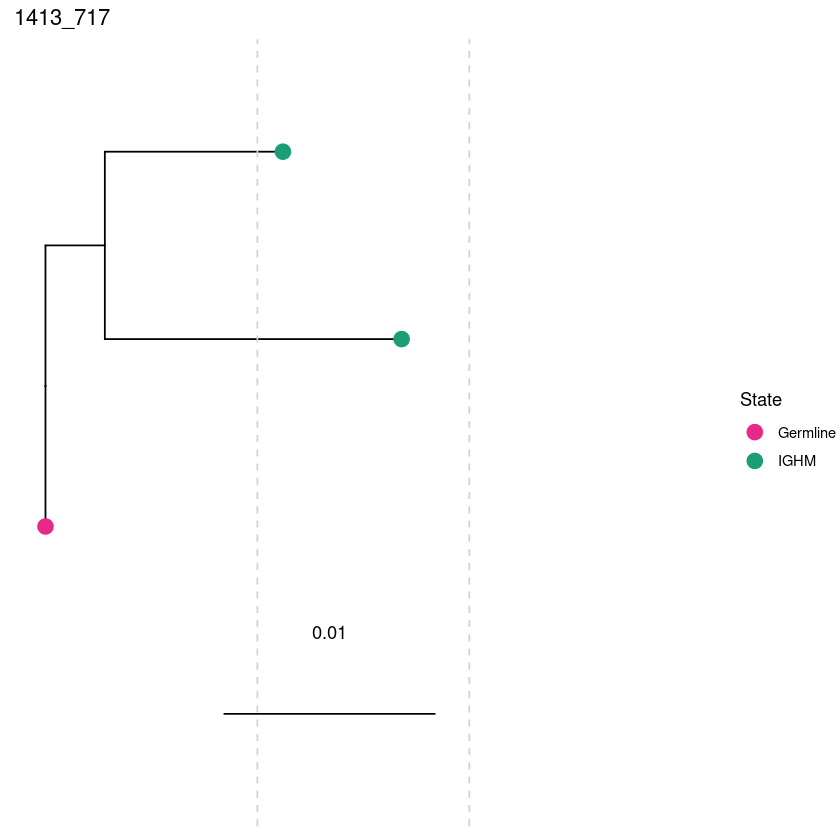

In [11]:
plots <- plotTrees(trees, tips="c_call", tipsize=4)

treeplot <- plots[[1]] + 
geom_vline(xintercept=c(0.01, 0.02), 
           linetype="dashed",color="lightgrey") + xlim(0,0.03)
ggtitle("B cell tree")

treeplot